In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

import pandas as pd

target = 'popularity'

features =  ['valence',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo']
data_path = "../data/decades_new/data_from_"

In [2]:
best_options = { "val" :  0.7354724934405781,  "ests" : 166,  "crit" : "gini", "depth" :  10 }

decades = [str(i) for i in range(20,100,10)]
decades.append("0")
decades.append("10")

decade_imps = {}
for decade in decades:    
    df = pd.read_csv(data_path + decade + "s.csv")
    
    X = df[features]
    y = df[target]

    forest_classifier = RandomForestClassifier(n_estimators=best_options["ests"], max_depth=best_options["depth"], criterion=best_options["crit"]) 

    forest_classifier.fit(X, y)
    
    feature_classifier_importances_df = pd.DataFrame(
        {"feature": features, "importance": forest_classifier.feature_importances_}
    ).sort_values("importance", ascending=False)
    
    decade_imps[decade] = feature_classifier_importances_df


In [3]:
feature_imps = {}
for feature in features:
    temp = []
    for decade in decades:
        temp_df = decade_imps[decade]
        temp_df2 = temp_df[temp_df["feature"] == feature]
        temp.append(temp_df2["importance"].iloc[0])        
            
    feature_imps[feature] = temp

In [4]:
feature_imps

{'valence': [0.09185890924673362,
  0.05465808578176746,
  0.05932636811567511,
  0.06058374879449914,
  0.07846327803531085,
  0.08591076564232118,
  0.08401325654101269,
  0.08574132473351426,
  0.08593867253636574,
  0.07687226205760184],
 'acousticness': [0.13358771650536327,
  0.09717611211771796,
  0.0925638180447736,
  0.19912847897926708,
  0.09842467394868407,
  0.0883134240124676,
  0.0920864996898037,
  0.0895648842047359,
  0.08877506259887459,
  0.09154982257500231],
 'artists': [0.1765133551397833,
  0.28441115095609654,
  0.2253121537358796,
  0.12482844980753831,
  0.14371815153296483,
  0.08508517042017233,
  0.08406783801976739,
  0.09057090224322333,
  0.09043254992788526,
  0.07399087213818084],
 'danceability': [0.05817503016352025,
  0.07054649138564739,
  0.06195693403168358,
  0.07835649151026397,
  0.08066483578627437,
  0.08936406734088584,
  0.0889365454896467,
  0.08931730384803321,
  0.09001976697114585,
  0.09800654990186272],
 'duration_ms': [0.0719930208

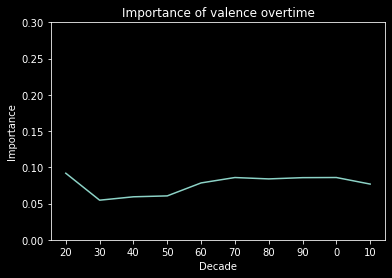

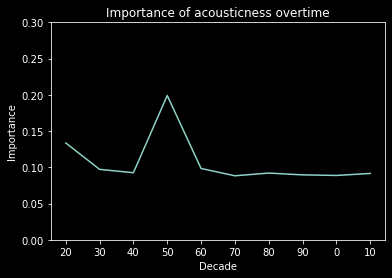

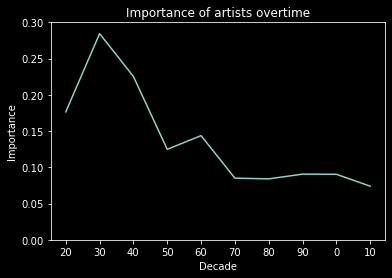

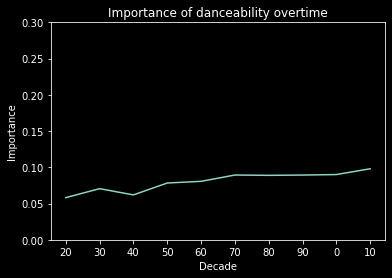

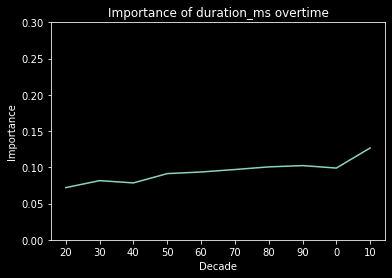

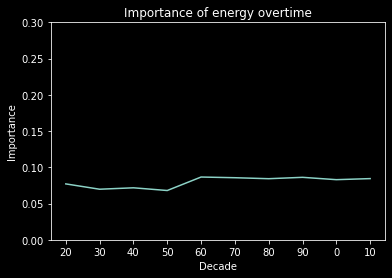

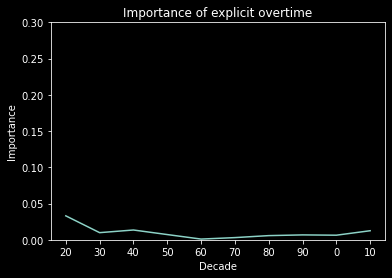

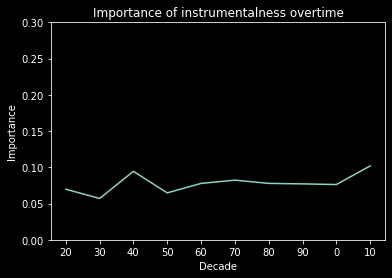

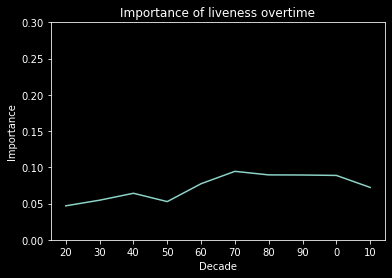

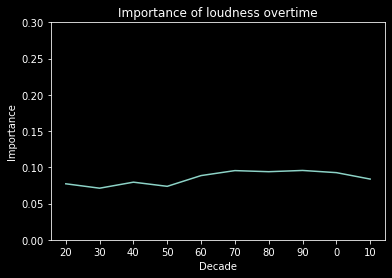

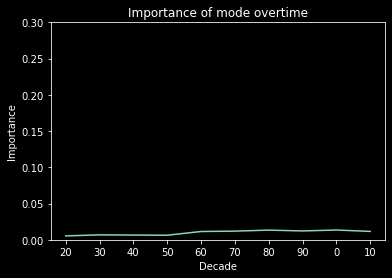

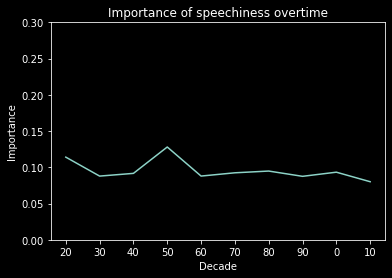

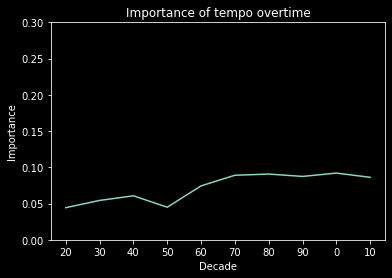

In [5]:
from matplotlib import style
style.use('dark_background')

for feature in features:
    plt.figure()
    plt.title(f"Importance of {feature} overtime")
    plt.xlabel("Decade")
    plt.ylabel("Importance")
    plt.ylim(top=0.3, bottom=0.0)
    plt.plot(decades, feature_imps[feature])